# TP n° 2



# Le modèle de Lotka-Volterra

L'objectif de cette partie est d'étudier numériquement le modèle de Lotka-Volterra et d'illustrer le paradoxe observé par d'Anconna (voir la fiche de cours n°1).

On se donne donc deux populations $H(t)$ de sardines (les proies) et $P(t)$ de requins (les prédateurs) au temps $t,$ dont l'évolution au cours du temps suit la loi :

\begin{equation*}
     \begin{cases}
    H'(t) = H(t)(a - b P(t)) \\
    P'(t) = P(t)(-c  + d H(t)),
     \end{cases}
\end{equation*}

où $a,b,c,d >0$.

On suppose connues les populations de sardines et de requins à l'instant initial $t_0=0$ :

\begin{equation*}
     \begin{cases}
    H(0) = H_0, \\
    P(0) = P_0
     \end{cases}
\end{equation*}
où $H_0\ge 0$ et $P_0\ge 0$ sont donnés.

Pour toutes les applications numériques, on choisit : $a=0,1$, $b=d=5\cdot 10^{-5},$ $c=0,04$. On choisit une population initiale de $H_0=2000$ sardines et $P_0=1000$ requins.

#### QUESTION 1

Interpréter le modèle et notamment le signe devant chaque terme.

#### QUESTION 2
En posant $Y = (H,P)$, réécrire le système
sous la forme $X' = F(X)$ où $F=(F_1,F_2)$ avec $F_1,F_2$ deux fonctions définies sur $R^2$ à valeurs dans $R$.

#### QUESTION 3

Représentez dans l'espace des phases $(H,P)$ le champ de vecteur associé à ce système d'équations. Que pouvez-vous intuiter sur l'allure des solutions ?

5e-05


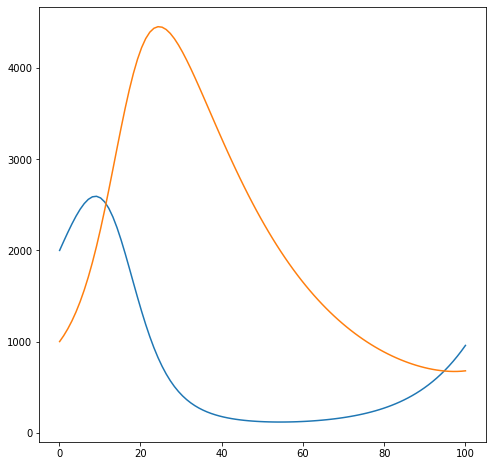

In [2]:
# COMPLETER LE CODE SUIVANT

import numpy as np
import matplotlib.pyplot as plt          # librairie graphique
from scipy.integrate import odeint

# Paramètres
a = 0.1
b = 5*10**(-5)
d = 5*10**(-5)
c = 0.04
print(b)

H0 = 2000
P0 = 1000

def F1(x,y):
    return x * (a - b*y)

def F2(x,y):
    return y * (-c + d*x)

def F(X,t):
    res = [F1(X[0],X[1]),F2(X[0],X[1])]
    return res
    
x, y = np.meshgrid(np.linspace(0.1, 3000, 15),np.linspace(0.1, 4500, 15))
t = np.linspace(0.1,100,100)
sol = odeint(F,[H0,P0],t)
n = np.sqrt(F1(x,y)**2+F2(x,y)**2)

fig, ax = plt.subplots(figsize=(8,8))
#ax.quiver(x,y,F1(x,y)/n,F2(x,y)/n)
ax.plot(t,sol, label = "H(t)")
# ax.axis('equal')
plt.show()

### Résolution numérique

On s'intéresse dans cette partie à l'approximation numérique de la solution du système de Lotka-Volterra dans un intervalle de temps de la forme $[0,T]$. On pourra prendre $T=200$ ans.

On va résoudre ce problème de Cauchy grâce à la fonction 'odeint' vue au TP précédent. 
On se donne un pas $\Delta t=\frac{T}{N}>0,$ où $N$ est un entier non nul, et on considère une subdivision uniforme de pas $\Delta t$ de l'intervalle $[0, T],$ définie par les $(N+1)$ points  

$$
t_0=0,\ t_1:=\Delta t,\ \cdots,\ t_N:=N\Delta t=T, 
$$

et on note note $H^n$ (resp. $P^n$) la valeur approchée de $H(t_n)$ (resp. $P(t_n)$) à l'instant $t_n$ pour $n=0,\cdots,N$. 

#### QUESTION 4

Afin d'appliquer la méthode 'odeint' à la résolution du problème de Cauchy qui nous intéresse, définir la fonction second membre (attention à l'ordre des arguments) :

$$ F(t,X) = (F_1(X), F_2(X))^t,$$

où $X=(x,y)^t \in R^2$.

Construire le vecteur $t = (t^0,\ldots,t^N)$ des temps discrets où la solution approchée sera calculée.

Construire la solution approchée à l'aide de la fonction `odeint`.

In [4]:
# COMPLETER LE CODE SUIVANT

# Paramètres
a = 0.1
b = 5*10**(-5)
d = 5*10**(-5)
c = 0.04

H0 = 2000
P0 = 1000

def F(X,t):
    res = [F1(X[0],X[1]),F2(X[0],X[1])]
    return res

y0 = [H0,P0]
t = np.linspace(0.1,100,100)

sol=odeint(F,y0,t)

#### QUESTION 5

Tracer dans la même figure les solutions approchées $[H_0,H_1,\ldots,H_N]$ et $[P_0,P_1,\ldots,P_N]$ en fonction du temps obtenues pour $\Delta t=0.01$. Rajouter des légendes et des titres à votre figure.

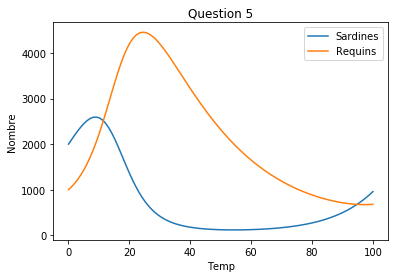

In [5]:
# COMPLETER LE CODE SUIVANT
plt.plot(t,sol[:,0], label='Sardines');
plt.plot(t,sol[:,1], label='Requins');

plt.title("Question 5");
plt.xlabel("Temp");
plt.ylabel("Nombre")
plt.legend();
plt.show()


#### QUESTION 6

Créer une seconde figure et tracer sur cette figure $P$ en fonction de $H$ dans le plan $(H,P)$ (portrait de phase). Superposer cette représentation à la figure de la question 3.

#### QUESTION!!!!

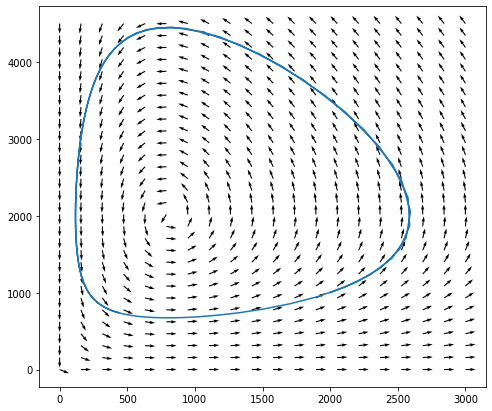

In [7]:

# COMPLETER LE CODE SUIVANT
# Paramètres
a =0.1;
b =5.0E-5;
c =0.04
d =5.0E-5 
H0,P0 = 2000,1000
def F1(x,y):
    return x *(a - b * y)

def F2(x,y):
    return y * (-c + d * x)

def F(X,t):
    res = [F1(X[0],X[1]),F2(X[0],X[1])]
    return res
    
x, y = np.meshgrid(np.linspace(0.1 , 3000, 20),np.linspace(0.1,4500, 30))
n=np.sqrt(F1(x,y)**2+F2(x,y)**2) 
t = np.linspace(0.1,200,100)
sol = odeint(F,[H0,P0],t)


fig, ax = plt.subplots(figsize = (8,7))
#plt.quiver(x,y,F1(x,y)/n,F2(x,y)/n)
#plt.axis('equal')
#plt.show()
ax.quiver(x,y,F1(x,y)/n,F2(x,y)/n)
ax.plot(sol[:,0],sol[:,1], label = "H(t)")

#### QUESTION 7

Commenter ces deux graphiques : expliquer clairement ce qui selon vous justifie les variations de chacune des espèces. 

##  L'impact de la pêche

Nous pêchons maintenant une même proportion $p$ de requins et de sardines ce qui se traduit par l'ajout de deux termes négatifs $-pH(t)$ et $-pP(t)$ dans les équations. Le modèle devient
\begin{equation*}
     \begin{cases}
        H'(t)&=(a-p)H(t)-bH(t)P(t),\\
        P'(t)&=(-c-p)P(t)+dH(t)P(t).
     \end{cases}
\end{equation*}

On choisit $p=0.03$.

#### QUESTION 8

Reprendre chacune des questions précédentes pour ce nouveau modèle. Visualiser la solution pour différentes valeurs de p.

#### QUESTION 9

Expliquer quel est l'impact de la pêche sur l'évolution des populations.

#### QUESTION 10

Quelle espèce est favorisée par la pêche? 

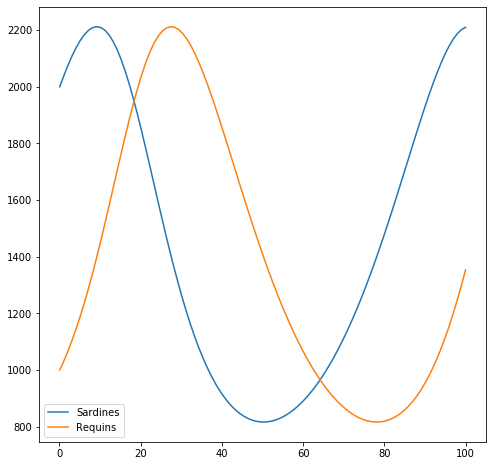

In [70]:
# COMPLETER LE CODE SUIVANT

import numpy as np
import matplotlib.pyplot as plt          # librairie graphique
from scipy.integrate import odeint

# Paramètres
a = 0.1
b = 5*10**(-5)
d = 5*10**(-5)
c = 0.04
p = 0.03

H0 = 2000
P0 = 1000

def F1(x,y):
    return (a-p)*x-b*x*y

def F2(x,y):
    return (-c-p)*y+d*x*y

def F(X,t):
    res = [F1(X[0],X[1]),F2(X[0],X[1])]
    return res
    
x, y = np.meshgrid(np.linspace(0.1, 3000, 15),np.linspace(0.1, 4500, 15))
t = np.linspace(0.1,100,100)
sol = odeint(F,[H0,P0],t)
n = np.sqrt(F1(x,y)**2+F2(x,y)**2)

fig, ax = plt.subplots(figsize=(8,8))
#ax.quiver(x,y,F1(x,y)/n,F2(x,y)/n)
ax.plot(t,sol[:,0],label='Sardines')
ax.plot(t,sol[:,1],label='Requins')
ax.legend()
# ax.axis('equal')
plt.show()